## New Zealand Migration inquiry

I found a csv with data on migration to and from New Zealand at *https://www.stats.govt.nz/large-datasets/csv-files-for-download/*. It has a sibling csv that I was considering joining with the country of origin. Instead, I decided to make a line plot with three lines representing arrivals, departures, and net migration. 

1. I will import the necessary packages: pandas and matplotlib.
2. I will create a date frame from the data in the file called 'migrants'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
migrants = pd.read_csv('international-migration-march-2024-estimated-migration-by-age-and-sex.csv')
migrants.head()

### Working the data into shape

3. I want a data frame that has rows for all the arrivals, departures, and net migrantion each month. The next step is to create a new data frame from 'migrants' with only the rows I want.

In [8]:
total_migrants = migrants[(migrants['sex'] == 'TOTAL') & (migrants['age'] == 'TOTAL')]

In [9]:
total_migrants.head()

,year_month,month_of_release,passenger_type,direction,sex,age,estimate,standard_error,status
16517,2001-01,2020-09,Long-term migrant,Arrivals,TOTAL,TOTAL,10541,0,Final
16518,2001-02,2020-09,Long-term migrant,Arrivals,TOTAL,TOTAL,10448,0,Final
16519,2001-03,2020-09,Long-term migrant,Arrivals,TOTAL,TOTAL,7870,0,Final
16520,2001-04,2020-09,Long-term migrant,Arrivals,TOTAL,TOTAL,7666,0,Final
16521,2001-05,2020-09,Long-term migrant,Arrivals,TOTAL,TOTAL,6766,0,Final


4. Now I will drop all of the irrelevant columns for this line graph

In [11]:
total_migrants = total_migrants.drop(columns=['month_of_release', 'passenger_type', 'sex', 'age', 'standard_error', 'status'])

In [12]:
total_migrants.head()

,year_month,direction,estimate
16517,2001-01,Arrivals,10541
16518,2001-02,Arrivals,10448
16519,2001-03,Arrivals,7870
16520,2001-04,Arrivals,7666
16521,2001-05,Arrivals,6766


In [13]:
total_migrants['direction'].value_counts()

direction
Arrivals      282
Departures    282
Net           282
Name: count, dtype: int64

### Pivot Table and Line Graph

In [15]:
total_migrants_pivot = total_migrants.pivot_table(values='estimate', index='year_month', columns='direction').reset_index()
total_migrants_pivot['Departures'] = total_migrants_pivot['Departures'] * -1
total_migrants_pivot.head()

direction,year_month,Arrivals,Departures,Net
0,2001-01,10541.0,-9812.0,729.0
1,2001-02,10448.0,-9183.0,1265.0
2,2001-03,7870.0,-8122.0,-252.0
3,2001-04,7666.0,-7178.0,488.0
4,2001-05,6766.0,-7998.0,-1232.0


<Axes: title={'center': 'Migration to and from New Zealand'}, xlabel='year_month'>

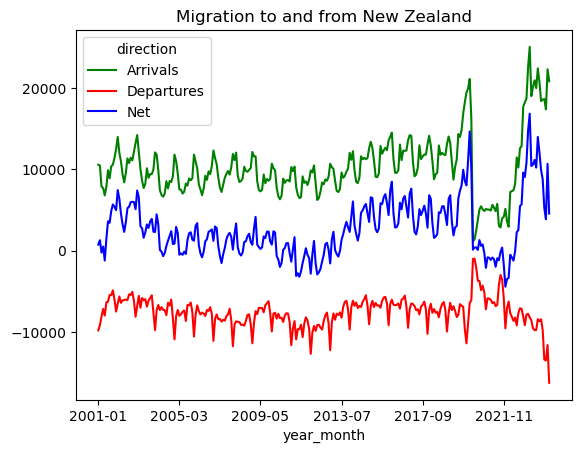

In [16]:
total_migrants_pivot.plot(kind='line', x='year_month', y=['Arrivals', 'Departures', 'Net'], \
                          color=['green', 'red', 'blue'], title='Migration to and from New Zealand')

### Commentary

The first feature that I noticed in this graph was the COVID-19 pandemic spike. Arrivals was at an all time high (which might be explained by people return from abroad for the pandemic), then arrivals and departures drop substantially. Although it is dramatic, this is not the most insightful feature. A second notable feature is the pre-pandemic (annual?) periodicity, and it is more notable that it never returns to normal.

Another intersting feature is the start of a gentle increase in arrivals starting around 2011. This feature might be explained by the start of the Syrian Civil War in 2011, which started a global refugee crisis. The next question I shall answer is whether that is the explanation for the increase. 

But the most surprising and dramatic freature of the graph is the current record departures and arrivals in New Zealand. Reporting suggest that people are leaving due to high cost of living. 

## First Attempt

### Breaking the DataFrame into three

5. From 'total_migrants', I will create three new data frames - 'net', 'arrivals', and 'departures' - and merge them into the 'direction' data-frame. I did not know whether the diffent categories under in the 'direction' column were the same in number, so I checked with .shape for each.

In [22]:
net = total_migrants[total_migrants['direction'] == 'Net']
arrivals = total_migrants[total_migrants['direction'] == 'Arrivals']
departures = total_migrants[total_migrants['direction'] == 'Departures']
departures['estimate'] = departures['estimate'] * -1

C:\Users\Owner\AppData\Local\Temp\ipykernel_6828\2351933420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['estimate'] = departures['estimate'] * -1


I ran into an issue trying to make the departures column negative. But it still works? 

In [24]:
departures.head()

,year_month,direction,estimate
33292,2001-01,Departures,-9812
33293,2001-02,Departures,-9183
33294,2001-03,Departures,-8122
33295,2001-04,Departures,-7178
33296,2001-05,Departures,-7998


### Putting the plot togeather

In [26]:
direction = arrivals.merge(departures, on='year_month', suffixes=['_a', '_d'])
direction = net.merge(direction, on='year_month')
direction.head()

,year_month,direction,estimate,direction_a,estimate_a,direction_d,estimate_d
0,2001-01,Net,729,Arrivals,10541,Departures,-9812
1,2001-02,Net,1265,Arrivals,10448,Departures,-9183
2,2001-03,Net,-252,Arrivals,7870,Departures,-8122
3,2001-04,Net,488,Arrivals,7666,Departures,-7178
4,2001-05,Net,-1232,Arrivals,6766,Departures,-7998


<Axes: title={'center': 'Migration to and from New Zealand'}, xlabel='year_month'>

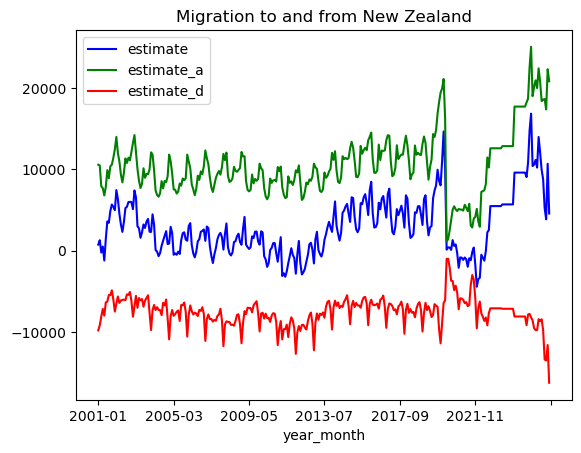

In [27]:
direction.plot(kind='line', x='year_month', y=['estimate', 'estimate_a', 'estimate_d'], color=['blue', 'green', 'red'], \
               title='Migration to and from New Zealand')

## When was the data released? 
I hope this question may help explain the periodicity issue

In [29]:
migrants['month_of_release'].value_counts().to_frame().sort_index()

,count
month_of_release,
2020-09,39334
2020-10,179
2020-11,178
2020-12,179
2021-01,179
2021-02,179
2021-03,180
2021-04,179
2021-05,180


## Random question
When I started playing with the data, I ran into a problem and I desided to save it here.

In [31]:
dis_migrants = migrants[(migrants['direction'] != 'Net') | (migrants['sex'] != 'TOTAL') | (migrants['age'] != 'TOTAL')]
dis_migrants.head()

,year_month,month_of_release,passenger_type,direction,sex,age,estimate,standard_error,status
0,2001-01,2020-09,Long-term migrant,Arrivals,Female,0-4 years,344,0,Final
1,2001-02,2020-09,Long-term migrant,Arrivals,Female,0-4 years,269,0,Final
2,2001-03,2020-09,Long-term migrant,Arrivals,Female,0-4 years,239,0,Final
3,2001-04,2020-09,Long-term migrant,Arrivals,Female,0-4 years,233,0,Final
4,2001-05,2020-09,Long-term migrant,Arrivals,Female,0-4 years,206,0,Final


The '5-9 years' row is not the first row after the '0-4 years' row, and I can find no elegant solution.

In [33]:
dis_migrants.groupby('age')['estimate'].sum().sort_index().to_frame()

,estimate
age,
0-4 years,748678
10-14 years,630302
15-19 years,985029
20-24 years,1554474
25-29 years,1973756
30-34 years,1481541
35-39 years,1043052
40-44 years,748691
45-49 years,493299


## Who is moving to New Zealand?

### Creating a new data frame 

1. I will create a new data frame from the sibling csv file

In [37]:
citizens = pd.read_csv('international-migration-march-2024-citizenship-by-visa-by-country-of-last-permanent-residence.csv')

In [38]:
citizens.head()

,year_month,month_of_release,passenger_type,direction,citizenship,visa,country_of_residence,estimate,standard_error,status
0,2001-09,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,1,0,Final
1,2002-03,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,3,0,Final
2,2005-01,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,5,0,Final
3,2005-04,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,1,0,Final
4,2005-07,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,1,0,Final


2. Do I need to worry about net or departures under the direction column? It turns out that I do not. I should drop some of what I do not need.

In [40]:
citizens.value_counts('direction')

direction
Arrivals    338125
Name: count, dtype: int64

In [41]:
citizens = citizens.drop(columns=['month_of_release', 'passenger_type', 'direction'])

3. Do I need to worry about New Zealand citizens or the sorts of visas people have? 

In [43]:
citizens['citizenship'].value_counts()

citizenship
TOTAL     154928
non-NZ    135681
NZ         47516
Name: count, dtype: int64

In [44]:
non_cit = citizens[citizens['citizenship'] == 'non-NZ'].drop(columns='citizenship')

In [45]:
non_cit['visa'].value_counts()

visa
TOTAL                         35404
Visitor                       24780
Work                          21258
Student                       17381
Resident                      17000
Other                         12231
NZ and Australian citizens     7627
Name: count, dtype: int64

### Regeional Residence 
4. I am most interested in where people were residing before they arrived. It turns out the country_of_residence has counts people more than once. Sometimes are counted under a region, and sometimes they are counted by a state.

In [47]:
non_cit['country_of_residence'].value_counts().to_frame().head(10)

,count
country_of_residence,
TOTAL,1854
Asia,1852
Europe,1851
The Americas,1850
Oceania and Antarctica,1845
Not Stated,1831
United States of America,1830
United Kingdom,1816
Africa and the Middle East,1799


5. It would be nice to know what global regions the table is using: Asia, Europe, The Americas, Oceania and Antarctica, Africa and the Middle East, Not Stated.

In [49]:
# I used this tool to search for a set of regional indexes
non_cit['country_of_residence'].value_counts().to_frame().query('1040 > count > 999')

,count
country_of_residence,
Kiribati,1020
Turkey,1013


### Putting togeather the data frame 
6. I can use what I learned about the regions to construct a handy data frame for my plot

In [51]:
regional_non_cit = non_cit[non_cit['country_of_residence'].isin(\
    ['Asia', 'Europe', 'The Americas', 'Oceania and Antarctica', 'Africa and the Middle East', 'Not Stated'])]
regional_non_cit.head()

,year_month,visa,country_of_residence,estimate,standard_error,status
202447,2001-01,NZ and Australian citizens,Africa and the Middle East,10,0,Final
202448,2001-02,NZ and Australian citizens,Africa and the Middle East,2,0,Final
202449,2001-05,NZ and Australian citizens,Africa and the Middle East,1,0,Final
202450,2001-06,NZ and Australian citizens,Africa and the Middle East,4,0,Final
202451,2001-07,NZ and Australian citizens,Africa and the Middle East,2,0,Final


In [52]:
regional_pivot = regional_non_cit.pivot_table(values='estimate', index='year_month', columns='country_of_residence').reset_index()
regional_pivot.head()

country_of_residence,year_month,Africa and the Middle East,Asia,Europe,Not Stated,Oceania and Antarctica,The Americas
0,2001-01,461.333333,1892.000000,870.000000,614.666667,1088.000000,308.000000
1,2001-02,578.000000,2447.333333,752.666667,637.333333,892.000000,370.000000
2,2001-03,616.000000,1866.666667,534.666667,408.666667,678.666667,188.666667
3,2001-04,644.000000,1900.666667,484.000000,422.666667,632.666667,132.666667
4,2001-05,444.666667,1498.666667,410.000000,373.333333,574.666667,156.666667


<Axes: title={'center': 'Residency of NZ Migrants'}, xlabel='year_month'>

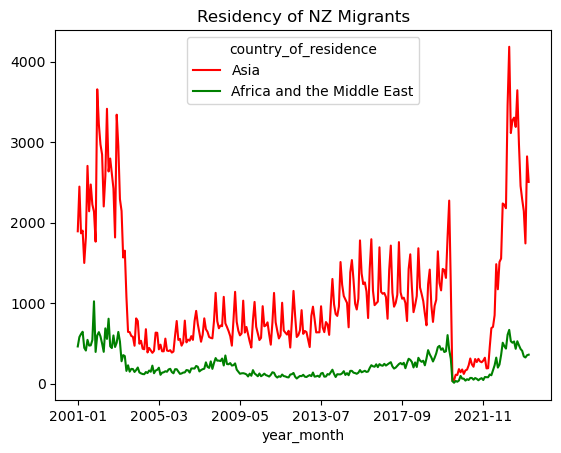

In [53]:
regional_pivot.plot(kind='line', x='year_month', y=['Asia', 'Africa and the Middle East'], color=['red', 'green'], title='Residency of NZ Migrants')

How do I make this less ugly?

<Axes: >

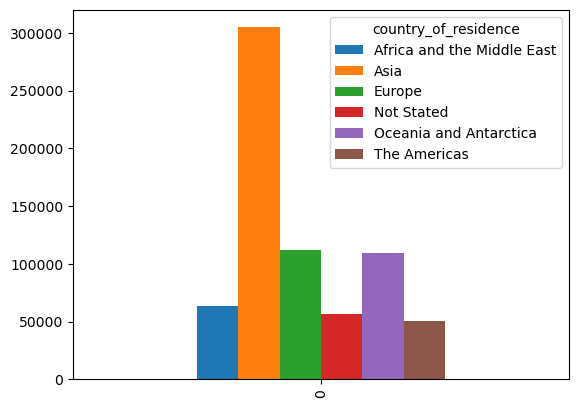

In [55]:
regional_pivot.set_index('year_month').sum().to_frame().transpose().plot(kind='bar')

## Random question
Why does the first of these plots turn out weird?

<Axes: title={'center': 'Migrant Arrivals in New Zealand'}, xlabel='year_month'>

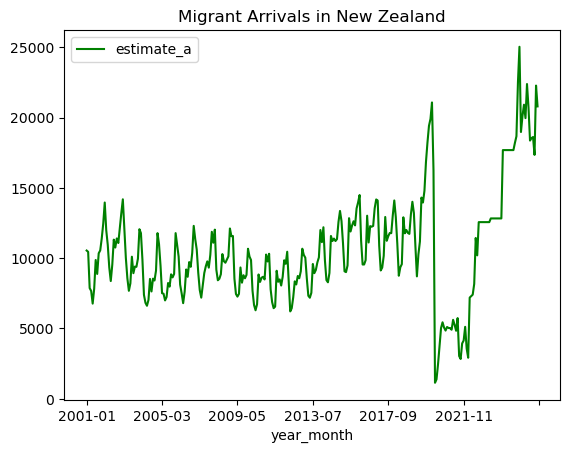

In [57]:
direction.plot(kind='line', x='year_month', y='estimate_a', color='green', title='Migrant Arrivals in New Zealand')

<Axes: title={'center': 'Migration Arrivals in New Zealand'}, xlabel='year_month'>

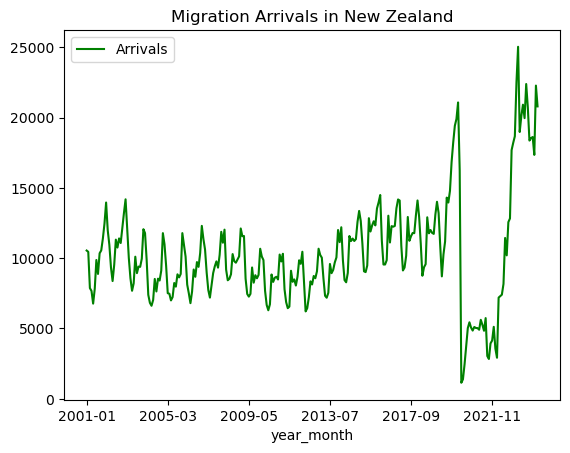

In [58]:
total_migrants_pivot.plot(kind='line', x='year_month', y='Arrivals', \
                          color='green', title='Migration Arrivals in New Zealand')